<h1 align="center">Past Test</h1>

<h2>Imports and General Functions</h2>

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from skimage import morphology
from skimage.color import rgb2gray
import scipy.misc
import scipy.fftpack as sp

filepath = "Past Papers/test_images/"

def displayImage(image,m=1):
    plt.gray()
    plt.imshow(image,vmin=0,vmax=m)
    plt.axis("off")
    plt.show()
    
def readImage(name):
    return plt.imread(filepath+name)

def saveImage(image,name,im_max=1):
    newImage = copy.deepcopy(image).astype(np.float32)
    scipy.misc.toimage(newImage, cmin=0.0, cmax=im_max).save(filepath+name)

<b>Question 1: </b>Write a script to apply contrast stretching on image ‘cubes org.png’. Save your script as ‘Q cubes.m’,
and the resulting image as ‘Q cubes.png’.

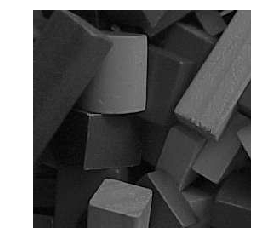

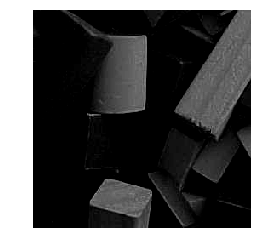

In [107]:
def contrastStretch(image,pl,ph,m=1):
    newImage = copy.deepcopy(image)
    for (x,y),value in np.ndenumerate(image):
        newImage[x,y] = piecewieseFunction(value,pl,ph,m)
    return newImage

def piecewieseFunction(a,pl,ph,m):
    if a <= pl:
        return 0
    elif a>pl and a<=ph:
        return m*(a-pl)/(ph-pl)
    else:
        return m

cubes = readImage("cubes_org.png")
displayImage(cubes)

pl = 0.2
ph = 0.8
Q_cubes = contrastStretch(cubes,pl,ph)
displayImage(Q_cubes)

<b>Question 2: </b>Image ‘square.tif’ is degraded due to low contrast and noise. As a result, some details are hidden.
Apply suitable techniques to adjust the contrast and remove the noise in the image. Save your script as
‘Q square.m’, and the resulting image as ‘Q square.png’.

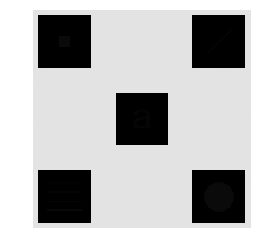

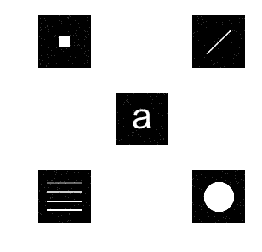

In [108]:
square = readImage("square.tif")
displayImage(square,255)

pl = 0
ph = 5
square_contrast = contrastStretch(square,pl,ph,m=255)
displayImage(square_contrast,m=255)

<b>Question 3: </b>Apply an averaging filter of size 5x5 to the noisy image ‘barbara noisy.png’. Save your script as
‘Q barbara.m’, and the resulting image as ‘Q barbara.png’.

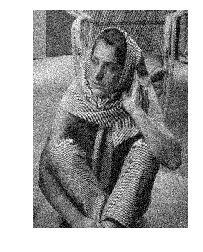

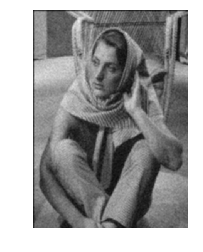

In [109]:
def applyFilter(image,filter):
    offset = math.floor(filter.shape[0]/2)
    padded = padZero(image,offset)
    newImage = copy.deepcopy(padded)
    for x in range(offset,padded.shape[0]):
        for y in range(offset,padded.shape[1]):
            g = 0
            for s in range(filter.shape[0]):
                for t in range(filter.shape[1]):
                    g += filter[s,t]*padded[x-s,y-t]
            newImage[x,y] = g
    return dePad(newImage,offset)
                    
    
def padZero(image,offset):
    X = image.shape[0]
    Y = image.shape[1]
    newImage = np.zeros((X+2*offset,Y+2*offset))
    newImage[offset:X+offset,offset:Y+offset] = image
    return newImage

def dePad(image,offset):
    X = image.shape[0]-2*offset
    Y = image.shape[1]-2*offset
    return image[offset:X+offset,offset:Y+offset]

def averageFilter(n):
    filter = np.ones((n,n))
    return (1.0/(n*n))*filter

barbara = readImage("barbara_noisy.png")
displayImage(barbara)
average = averageFilter(5)
Q_barbara = applyFilter(barbara,average)
displayImage(Q_barbara)

<b>Question 4: </b>You are given an image ‘rice.tif’.
<ul>
    <li>Write a script that convert the image to a black and white image using the following thresholding
transform function:
    <li>implement the following algorithm: firstly, apply an opening of the image using a sufficiently large
‘disk’ structuring element; secondly, subtract the result of previous step from the original image;
and lastly, apply a suitable thresholding transform to the result of second step. Save your script as
‘Q rice 2.m’, and save the resulting image as ‘Q rice 2.png’.
</ul>

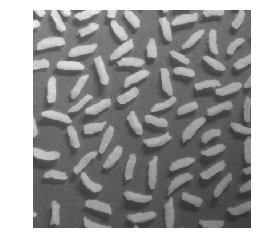

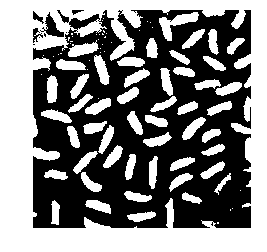

In [110]:
def threshold(image,t,m=1):
    return contrastStretch(image,t,t,m)

rice = readImage("rice.tif")
Q_rice_1 = threshold(rice,128,m=255)
displayImage(rice,m=255)
displayImage(Q_rice_1,m=255)

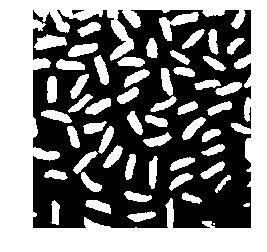

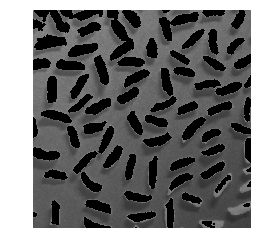

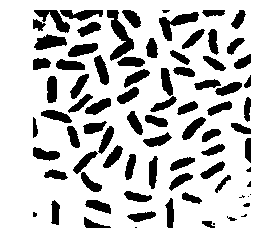

In [111]:
dsize = 3
B = morphology.disk(dsize)
Q_rice_1 = Q_rice_1.astype(np.bool)
rice_open = morphology.binary_opening(Q_rice_1,B)
displayImage(rice_open)

rice_subtract = rice-rice_open*255
displayImage(rice_subtract,255)

Q_rice_2 = threshold(rice_subtract,50,m=255)
displayImage(Q_rice_2,255)

<b>Question 5: </b>Write a script that finds the external and internal boundaries of image ‘ricenew.png’. Save your scriptas ‘Qrice3.m’, and save the resulting external boundary image as ‘ricenewexB.png’, and internalboundary as ‘ricenewinB.png’

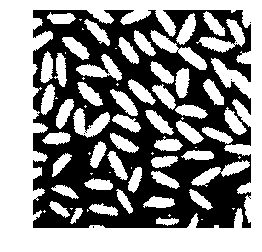

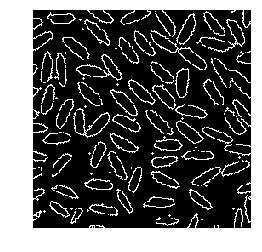

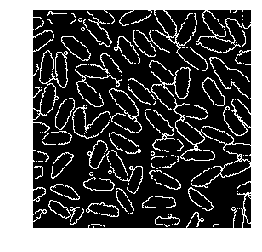

In [112]:
def getInternalBoundary(image,mask):
    eroded = morphology.binary_erosion(image,mask)
    return image-eroded

def getExternalBoundary(image,mask):
    dilated = morphology.binary_dilation(image,mask)
    return dilated-image

rice_new = readImage("rice_new.png").astype(np.bool)
rice_new = rgb2gray(rice_new)
B = np.ones((3,3)).astype(np.bool)


internal = getInternalBoundary(rice_new,B)
external = getExternalBoundary(rice_new,B)

displayImage(rice_new)
displayImage(internal)
displayImage(external)

<b>Question 6: </b>Write a script that convert image (a) (‘niceworkb.png’) in Figure 1 to image (b) in the same figure.Save  your  script  as  ‘Qnicework.m’,  and  the  resulting  image  as  ‘Qnicework.png’.   (Hint:  this  is  aregion filling problem andimfillfunction can be used, where you specify a location in the function.See helpimfill.)

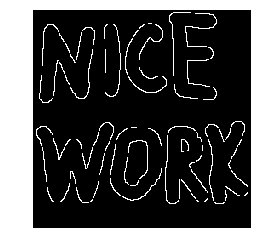

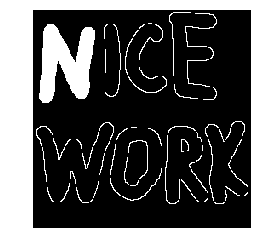

C:\Users\Tamlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


In [113]:
def fillRegion(image,mask,x,y):
    P = np.zeros(image.shape)
    P[x,y] = 1
    sets = [P]
    i = 0
    while True:
        Xi = np.logical_and(morphology.binary_dilation(sets[i],mask),np.logical_not(image))
        if np.array_equal(Xi,sets[i]):
            break
        sets.append(Xi)
        i += 1
    return np.logical_or(sets[-1],image)
        
nice = readImage("nicework_b.png").astype(np.bool)
nice = rgb2gray(nice)
B = morphology.square(3)
Q_nicework = fillRegion(nice,B,57,57)
displayImage(nice)
displayImage(Q_nicework)
saveImage(Q_nicework,"Q_nicework.png")

<b>Question 7: </b>Apply a DFT filtering (i.e., filtering in the frequency domain) to image ‘window.png’ using a ‘Sobel’horizontal edge detector. Save your script as ‘Qwindow.m’, and the resulting image as ‘Qwindow.png’.

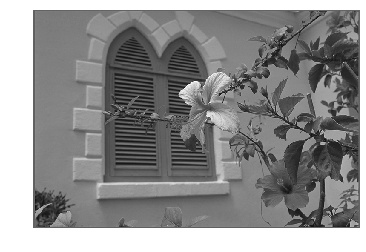

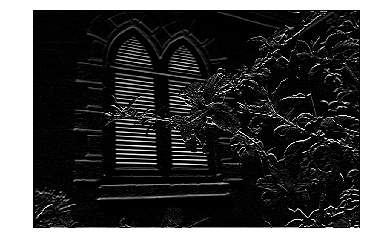

In [126]:
def fourier(image,mask):
    A = image.shape[0]
    B = image.shape[1]
    C = mask.shape[0]
    D = mask.shape[1]
    P = nextPowerOf2(A+C-1)
    Q = nextPowerOf2(B+D-1)
    fp = np.zeros((P,Q))
    hp = np.zeros((P,Q))
    fp[0:A,0:B] = image
    hp[0:C,0:D] = mask
    F = sp.fft2(fp)
    H = sp.fft2(hp)
    #displayImage(np.real(F))
    #displayImage(np.real(H))
    G = H*F
    g = np.real(sp.ifft2(G))
    return g[0:A,0:B]

def nextPowerOf2(x):
    i = 1
    while 2**i < x:
        i += 1
    return 2**i
        
    

window = readImage("window.png")
sobel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
displayImage(window)
windowFilter = fourier(window,sobel)
displayImage(windowFilter)